# Data Exploration and Visualization of Predictive Manintenance Data

Download and read predictive maintenance data. Make Data Exploration by Pandas with all the techniques you know. Make inputation of null values. Plot all data distributions. Make scatterplots of some attributes and all the possible visualizations you know by Matplotlib and Seaborn. 

https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset

In [ ]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv')
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [ ]:
df.value_counts()

UDI    Product ID  Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  HDF  PWF  OSF  RNF
1      M14860      M     298.1                308.6                    1551                    42.8         0                0                0    0    0    0    0      1
6671   L53850      L     301.5                310.6                    1998                    20.2         210              0                0    0    0    0    0      1
6664   L53843      L     301.3                310.4                    1504                    47.2         193              0                0    0    0    0    0      1
6665   L53844      L     301.3                310.4                    1538                    38.4         195              0                0    0    0    0    0      1
6666   L53845      L     301.3                310.4                    1440                    41.5         197              0                0    0  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [ ]:
passed = df[(df["Machine failure"] == 0)]["Product ID"].count()
failed = df[(df["Machine failure"] == 1)]["Product ID"].count()
rows = len(df.index)

print (f"Total Failures in dataset {failed/rows *100}%")


Total Failures in dataset 3.39%


<BarContainer object of 2 artists>

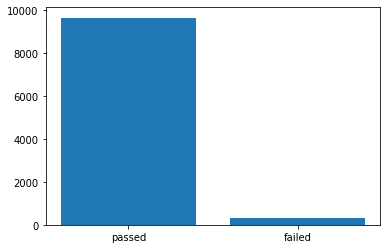

In [ ]:
# Failed vs Not failed
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
x_axis = ["passed","failed"]
y_axis = [passed,failed]
ax.bar(x_axis,y_axis)

<BarContainer object of 3 artists>

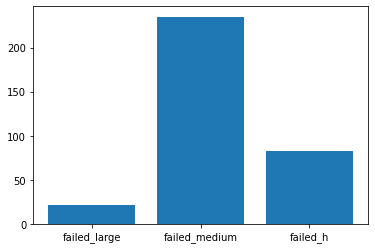

In [ ]:
import matplotlib.pyplot as plt
failed = df[(df["Machine failure"] == 1)]
fig, ax = plt.subplots()

x_axis = ["failed_large", "failed_medium", "failed_h"]
y_axis = df[(df["Machine failure"] == 1)].groupby("Type")["Product ID"].count()

# Failures by type
ax.bar(x_axis, y_axis)

,TWF,HDF,PWF,OSF,RNF
TWF,1.000000,-0.283903,-0.228057,-0.195666,0.137277
HDF,-0.283903,1.000000,-0.405468,-0.374446,-0.038973
PWF,-0.228057,-0.405468,1.000000,-0.224036,-0.033940
OSF,-0.195666,-0.374446,-0.224036,1.000000,-0.034685
RNF,0.137277,-0.038973,-0.033940,-0.034685,1.000000


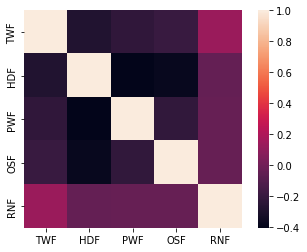

In [ ]:
# Failure correlation
import seaborn as sns

fig,ax = plt.subplots()
correlation = failed[["TWF","HDF", "PWF", "OSF", "RNF"]].corr()
display(correlation)
sns.heatmap(correlation, square=True)
plt.show()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
UDI,1.000000,0.123816,0.365170,-0.097226,0.073817,0.102813,0.123604,-0.072879,-0.089667,0.086931,-0.023700
Air temperature [K],0.123816,1.000000,0.848669,-0.142306,0.035488,-0.229465,-0.112754,0.580038,-0.244544,-0.259441,0.021394
Process temperature [K],0.365170,0.848669,1.000000,-0.074655,0.016210,-0.104193,-0.036387,0.262275,-0.153753,-0.101527,0.024356
Rotational speed [rpm],-0.097226,-0.142306,-0.074655,1.000000,-0.879944,-0.108680,0.071836,-0.296813,0.434216,-0.242481,-0.012946
Torque [Nm],0.073817,0.035488,0.016210,-0.879944,1.000000,-0.021317,-0.298829,0.131416,-0.063099,0.319898,-0.012536
Tool wear [min],0.102813,-0.229465,-0.104193,-0.108680,-0.021317,1.000000,0.395875,-0.360862,-0.359836,0.560967,0.047330
TWF,0.123604,-0.112754,-0.036387,0.071836,-0.298829,0.395875,1.000000,-0.283903,-0.228057,-0.195666,0.137277
HDF,-0.072879,0.580038,0.262275,-0.296813,0.131416,-0.360862,-0.283903,1.000000,-0.405468,-0.374446,-0.038973
PWF,-0.089667,-0.244544,-0.153753,0.434216,-0.063099,-0.359836,-0.228057,-0.405468,1.000000,-0.224036,-0.033940
OSF,0.086931,-0.259441,-0.101527,-0.242481,0.319898,0.560967,-0.195666,-0.374446,-0.224036,1.000000,-0.034685


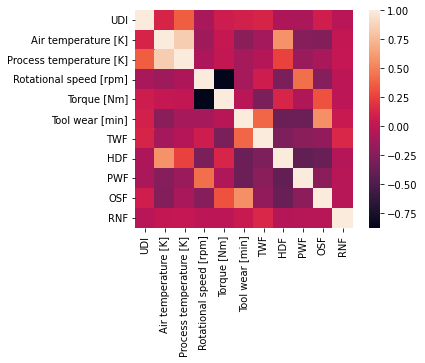

In [ ]:
# All correlation
import seaborn as sns

fig,ax = plt.subplots()
correlation = failed[failed.columns[~df.columns.isin(['Machine failure'])]].corr()
display(correlation)
sns.heatmap(correlation, square=True)
plt.show()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
50,51,L47230,L,298.9,309.1,2861,4.6,143,1,0,0,1,0,0
69,70,L47249,L,298.9,309.0,1410,65.7,191,1,0,0,1,1,0
77,78,L47257,L,298.8,308.9,1455,41.3,208,1,1,0,0,0,0
160,161,L47340,L,298.4,308.2,1282,60.7,216,1,0,0,0,1,0
161,162,L47341,L,298.3,308.1,1412,52.3,218,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9758,9759,L56938,L,298.6,309.8,2271,16.2,218,1,1,0,0,0,0
9764,9765,L56944,L,298.5,309.5,1294,66.7,12,1,0,0,1,0,0
9822,9823,L57002,L,298.5,309.4,1360,60.9,187,1,0,0,0,1,0
9830,9831,L57010,L,298.3,309.3,1337,56.1,206,1,0,0,0,1,0


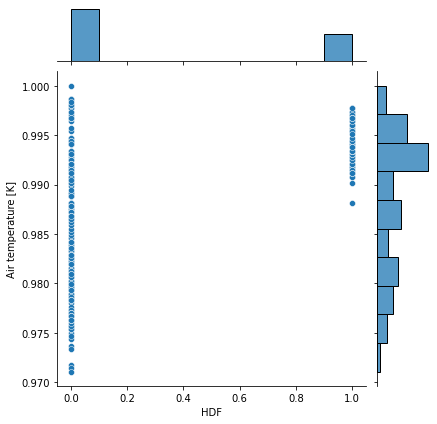

In [ ]:
import seaborn as sns
failed = df[(df["Machine failure"] == 1)]
display(failed)
hdf_normalised = failed["HDF"] /failed["HDF"].abs().max()
air_temp_normalised = failed["Air temperature [K]"] /failed["Air temperature [K]"].abs().max()
new_data = pd.DataFrame({'HDF':hdf_normalised,'Air temperature [K]':air_temp_normalised})
sns.jointplot(x="HDF", y="Air temperature [K]", data=new_data);
plt.show()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
50,51,L47230,L,298.9,309.1,2861,4.6,143,1,0,0,1,0,0
69,70,L47249,L,298.9,309.0,1410,65.7,191,1,0,0,1,1,0
77,78,L47257,L,298.8,308.9,1455,41.3,208,1,1,0,0,0,0
160,161,L47340,L,298.4,308.2,1282,60.7,216,1,0,0,0,1,0
161,162,L47341,L,298.3,308.1,1412,52.3,218,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9758,9759,L56938,L,298.6,309.8,2271,16.2,218,1,1,0,0,0,0
9764,9765,L56944,L,298.5,309.5,1294,66.7,12,1,0,0,1,0,0
9822,9823,L57002,L,298.5,309.4,1360,60.9,187,1,0,0,0,1,0
9830,9831,L57010,L,298.3,309.3,1337,56.1,206,1,0,0,0,1,0


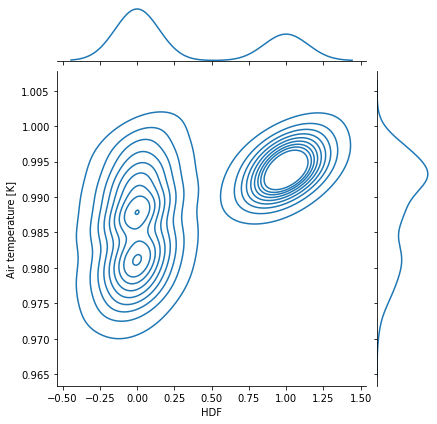

In [ ]:
import seaborn as sns
failed = df[(df["Machine failure"] == 1)]
display(failed)
hdf_normalised = failed["HDF"] /failed["HDF"].abs().max()
air_temp_normalised = failed["Air temperature [K]"] /failed["Air temperature [K]"].abs().max()
new_data = pd.DataFrame({'HDF':hdf_normalised,'Air temperature [K]':air_temp_normalised})
# sns.jointplot(x="HDF", y="Air temperature [K]", data=new_data);
sns.jointplot(x="HDF", y="Air temperature [K]", kind="kde", data=new_data)

plt.show()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
50,51,L47230,L,298.9,309.1,2861,4.6,143,1,0,0,1,0,0
69,70,L47249,L,298.9,309.0,1410,65.7,191,1,0,0,1,1,0
77,78,L47257,L,298.8,308.9,1455,41.3,208,1,1,0,0,0,0
160,161,L47340,L,298.4,308.2,1282,60.7,216,1,0,0,0,1,0
161,162,L47341,L,298.3,308.1,1412,52.3,218,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9758,9759,L56938,L,298.6,309.8,2271,16.2,218,1,1,0,0,0,0
9764,9765,L56944,L,298.5,309.5,1294,66.7,12,1,0,0,1,0,0
9822,9823,L57002,L,298.5,309.4,1360,60.9,187,1,0,0,0,1,0
9830,9831,L57010,L,298.3,309.3,1337,56.1,206,1,0,0,0,1,0


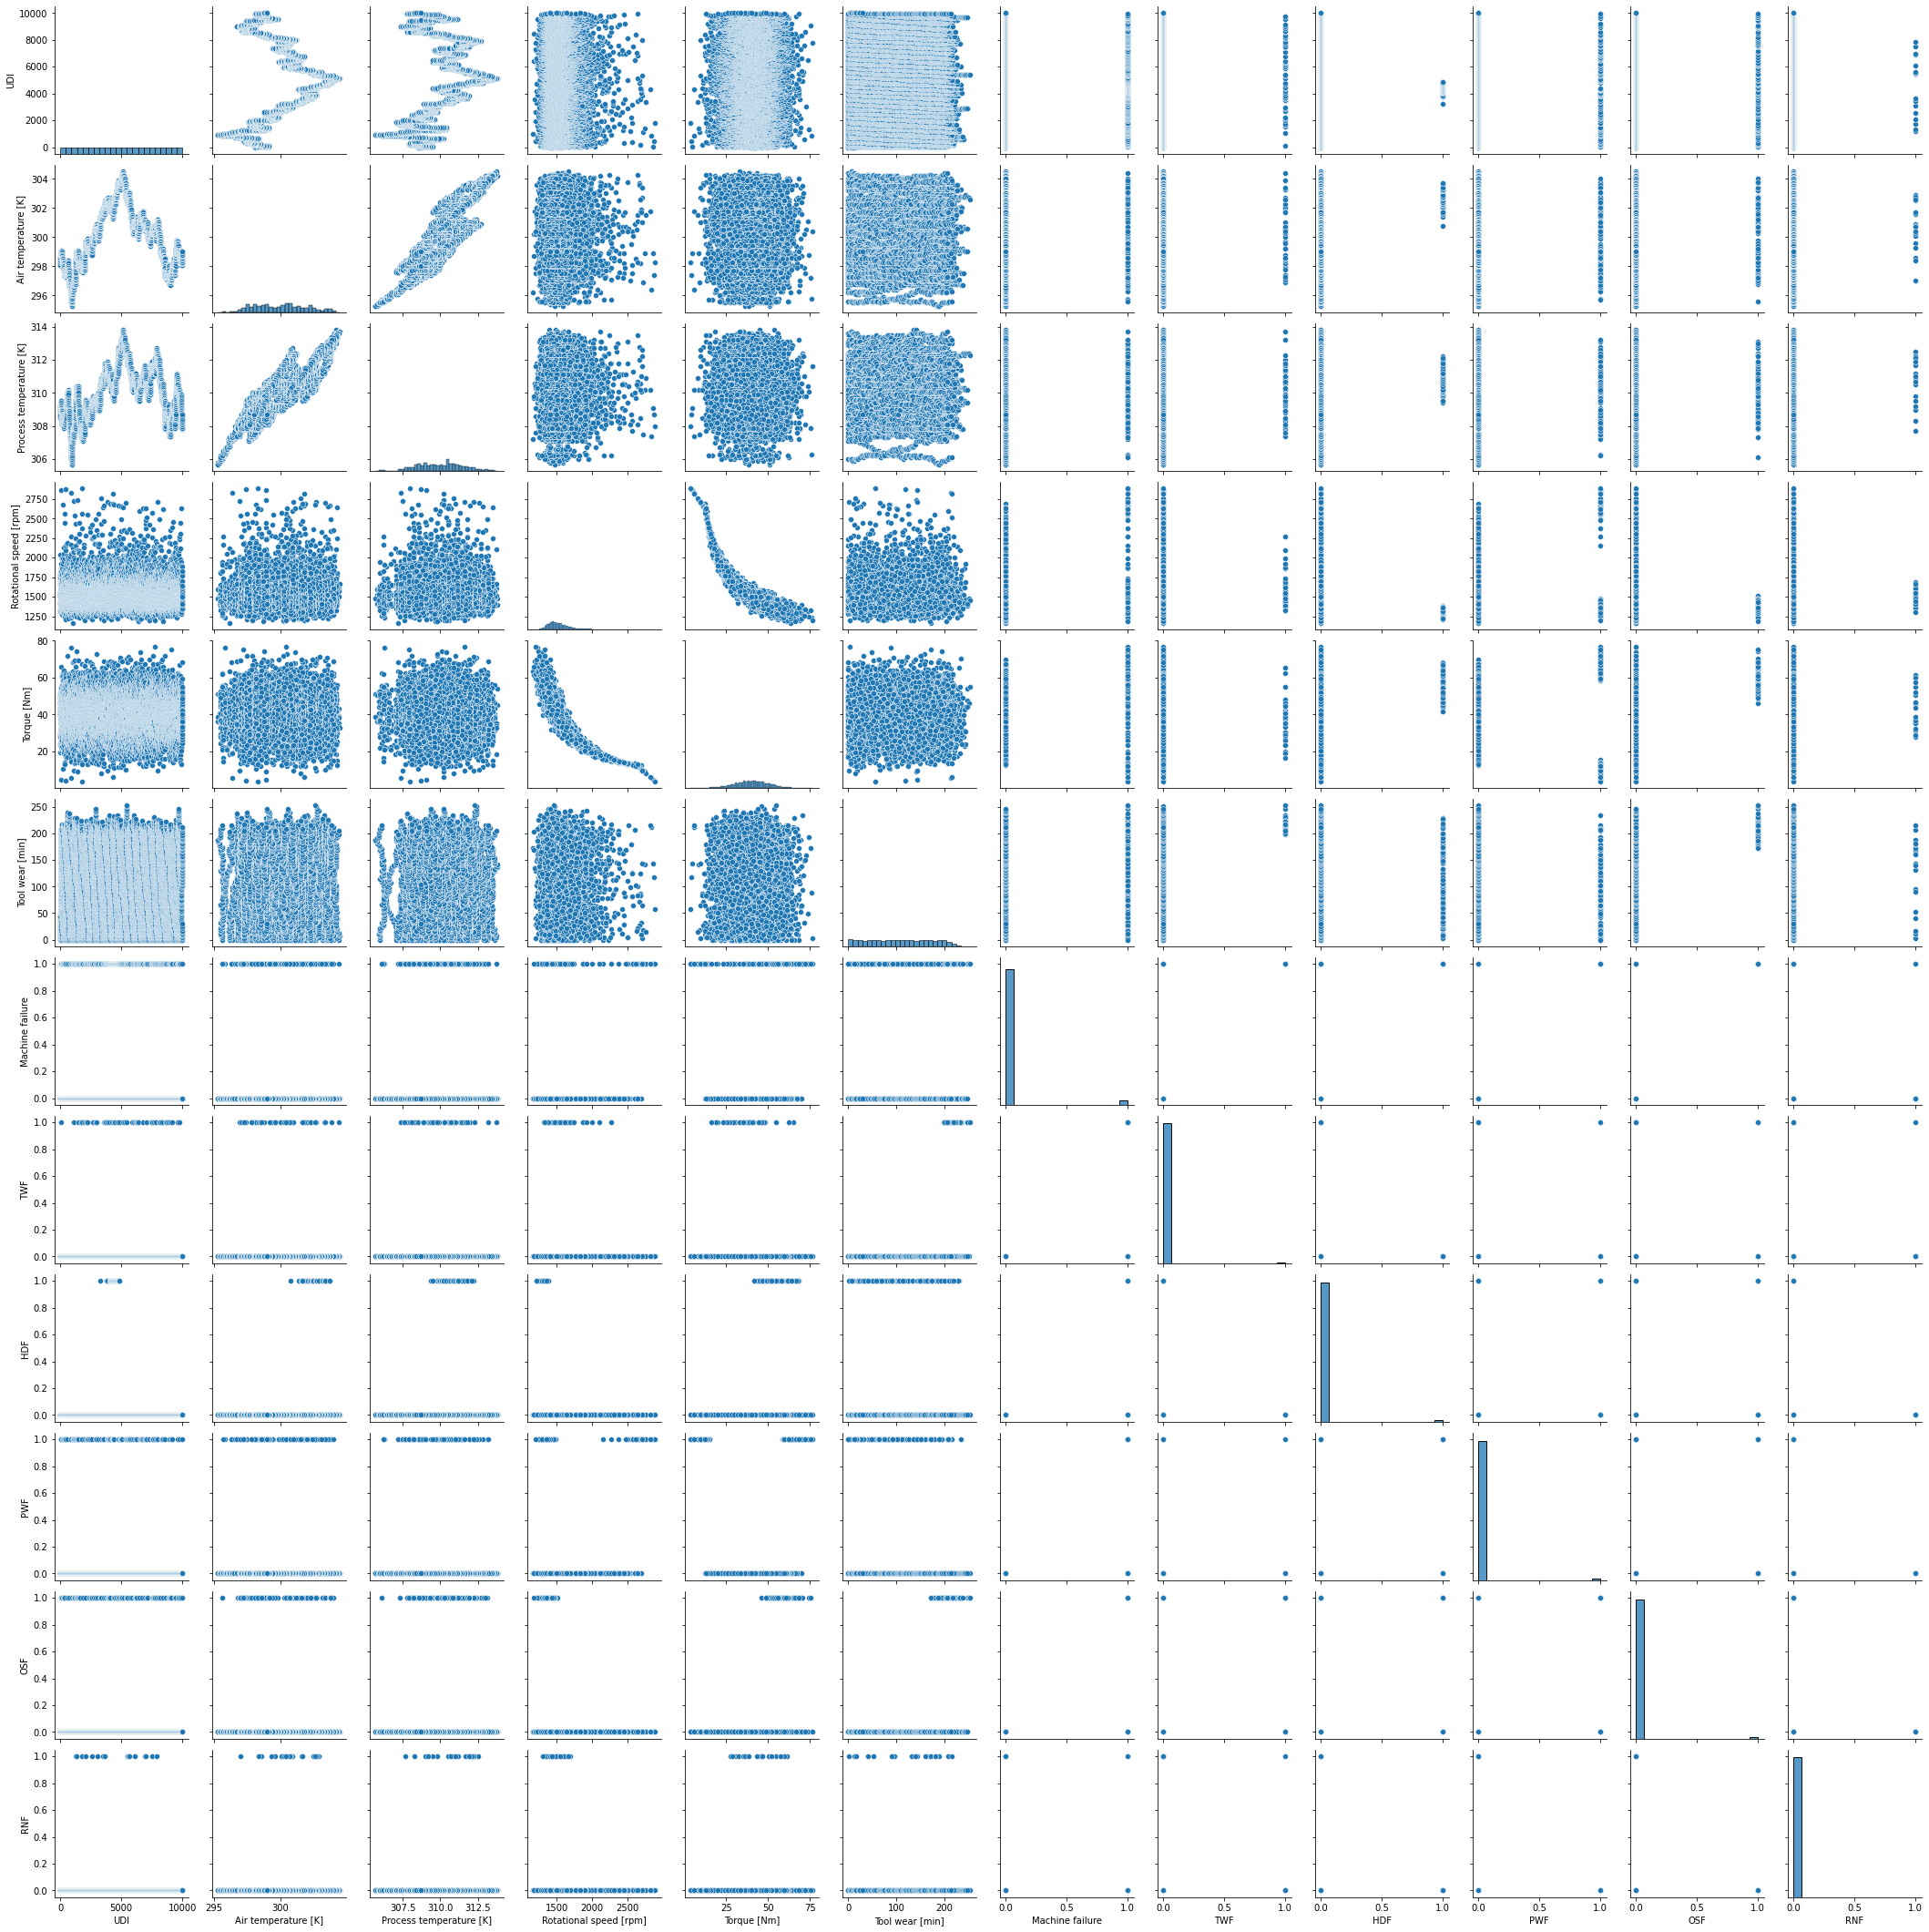

In [ ]:
import seaborn as sns
failed = df[(df["Machine failure"] == 1)]
display(failed)
hdf_normalised = failed["HDF"] /failed["HDF"].abs().max()
air_temp_normalised = failed["Air temperature [K]"] /failed["Air temperature [K]"].abs().max()
new_data = pd.DataFrame({'HDF':hdf_normalised,'Air temperature [K]':air_temp_normalised})
# sns.jointplot(x="HDF", y="Air temperature [K]", data=new_data);
# sns.jointplot(x="HDF", y="Air temperature [K]", kind="kde", data=new_data)
sns.pairplot(df)

plt.show()